# OSSEN Tutorial-Elsa Arcaute: Street Networks and Accessibility

Authors:
- Elsa Arcaute (e.arcaute@ucl.ac.uk)
- Miao Zeng (ucbqmz7@ucl.ac.uk)
- Andrew Renninger (andrew.renninger.12@ucl.ac.uk)
- Xiuning Zhang (xiuning.zhang.23@ucl.ac.uk)

## Introduction
This tutorial is designed to introduce you to the analysis of urban networks using Python. The tutorial is divided into two parts:
1. **Street Network**: this part shows you how to represent and analyse the street system as a network using the OSMnx library. It helps you to download and analyse spatial data from OpenStreetMap.
2. **Network Percolation and Accessibility**: Besides the basic statistical description of the street networks, we will then apply percolation analysis to the street network to find spatial clusters on different scales, as well as conduct analysis of network accessibility.

In [1]:
# -*- coding: utf-8 -*-
!git clone https://github.com/xnzhang-33/OSSEN-Workshop

Cloning into 'OSSEN-Workshop'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 174 (delta 17), reused 32 (delta 9), pack-reused 130 (from 1)
Receiving objects: 100% (174/174), 92.28 MiB | 33.36 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
# Install all required packages for the tutorial
# !pip install -q --upgrade pip
!pip install -q matplotlib networkx osmnx mapclassify colorcet geopandas folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.3/260.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 130.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 7.7 MB/s eta 0:00:00


## Part I Street Networks
In the first part of this tutorial, we will learn about one specific kind of urban network—the street network:
1. Understand how to represent the street system as a network.
2. Learn to use the OSMnx library.

### 1. Representing the Street Network as a Graph
![street network representation](https://github.com/xnzhang-33/OSSEN-Workshop/blob/main/street_networks.png?raw=1)

From: [Street Network Studies: from Networks to Models and their Representations](https://link.springer.com/article/10.1007/s11067-018-9427-9)

###  2.The OSMnx library
It is a Python library to help you download and analyse spatial data from OpenStreetMap.
https://osmnx.readthedocs.io/en/stable/

OSMnx is built on top of GeoPandas, and NetworkX:
* Downloads and creates a NetworkX graph of street networks or other infrastructure networks
    * Automatically cleans (topologically corrects) the network for you.
* Download any other spatial geometries (buildings, POIs, place **boundaries**)

#### **Step 1** Install & Import Libraries

In [3]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
# from osgeo import gdal

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas.core.frame")

# Set pandas display options for better readability
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

#### **Step 2** Acquire Street Network

In [5]:
# We can build a graph by giving the name of the place
G1 = ox.graph_from_place('Oxford, England, United Kingdom', network_type='drive')
print(type(G1))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


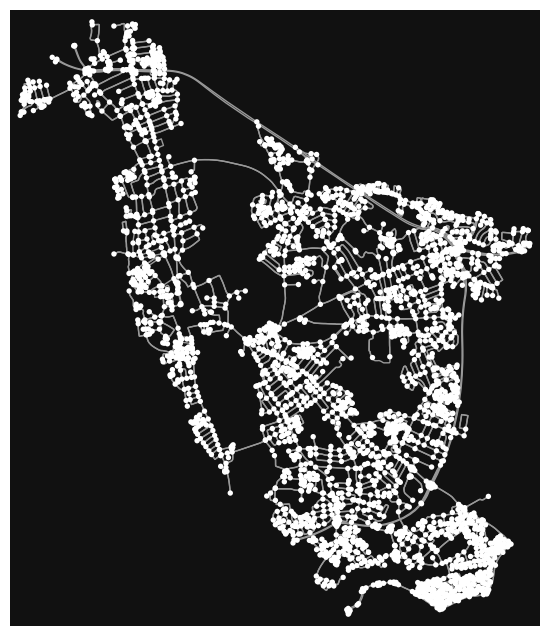

In [6]:
fig, ax = ox.plot_graph(G1)


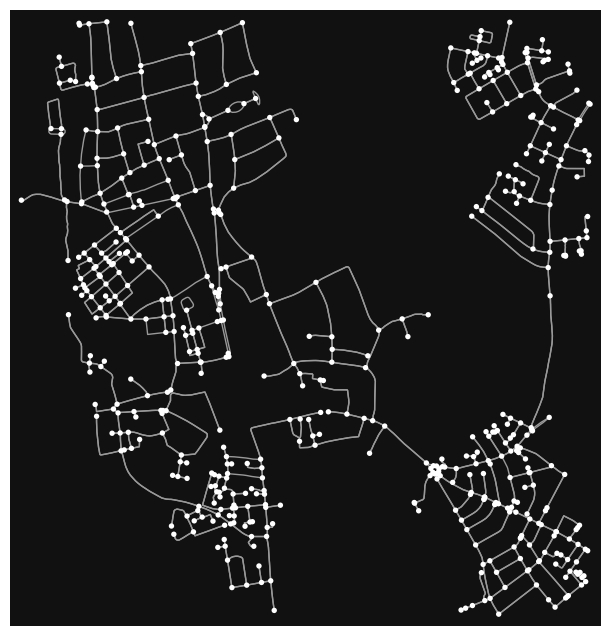

In [7]:
# We can also build a graph by giving the coordinates and a radius

Uni_Oxford = (51.7570,-1.2545)
radius = 1500 # metres
G = ox.graph_from_point(Uni_Oxford, dist=radius, network_type='drive')
fig, ax = ox.plot_graph(G)

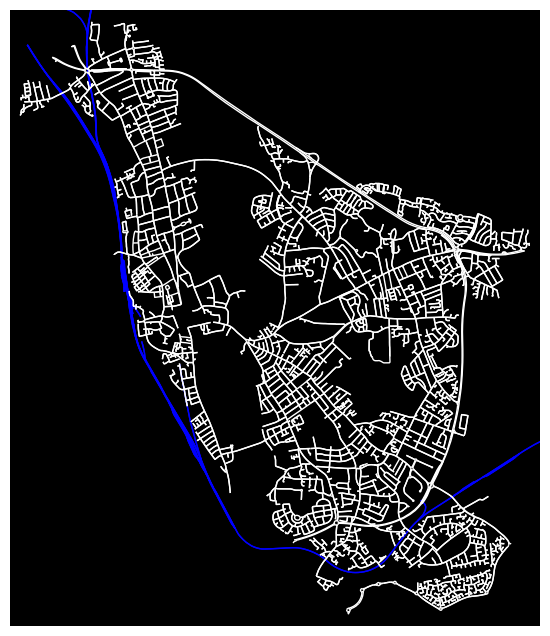

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
# We can also get other infrastructure networks
# change the overpass query to meet the new style 'New York, NY, USA'
G = ox.graph_from_place('Oxford, England, United Kingdom',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"]')

# Plot the railway network
fig, ax = ox.plot_graph(G, node_size=0, edge_color='blue', edge_linewidth=1, bgcolor='black', show=False, close=False)

# Plot the road network on top of the same figure
ox.plot_graph(G1, node_size=0, edge_color='w', edge_linewidth=1, bgcolor='black', ax=ax, show=True)

#### **Step 3** Understanding the Data Structure & Getting some Basic Statistics

In [9]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G1)
stats

{'n': 3400,
 'm': 7563,
 'k_avg': 4.448823529411765,
 'edge_length_total': 671874.4082187448,
 'edge_length_avg': 88.83702343233436,
 'streets_per_node_avg': 2.3841176470588237,
 'streets_per_node_counts': {0: 0, 1: 1107, 2: 28, 3: 2119, 4: 144, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.3255882352941176,
  2: 0.00823529411764706,
  3: 0.6232352941176471,
  4: 0.042352941176470586,
  5: 0.000588235294117647},
 'intersection_count': 2293,
 'street_length_total': 362427.99802467675,
 'street_segment_count': 4041,
 'street_length_avg': 89.68770057527264,
 'circuity_avg': 1.0631870001792152,
 'self_loop_proportion': 0.004949269982677555}

In [10]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.convert.to_digraph(G1), weight="length")

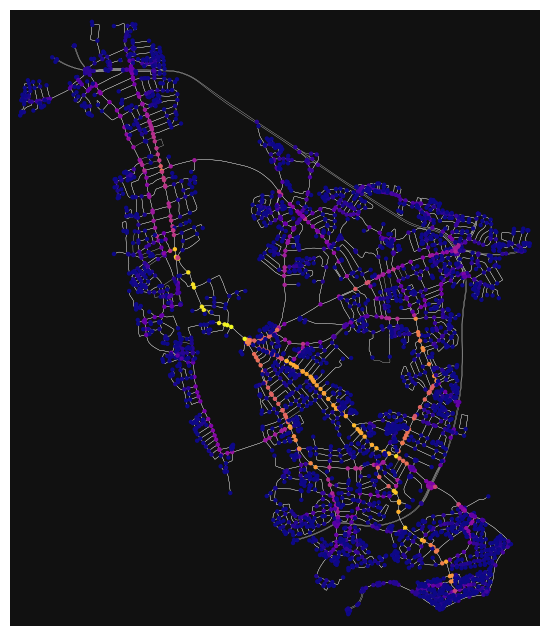

In [11]:
# add the betweenness centrality values as new node attributes, then plot
nx.set_node_attributes(G1, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G1, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G1,
    node_color=nc,
    node_size=10,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

#### **Step 4** Acquire Other Spatial Data

In [12]:
# get building footprints for the University of Oxford
buildings = ox.features_from_point(Uni_Oxford, dist=radius,tags={'building':True})
# get amenities for the University of Oxford
amenities = ox.features_from_point(Uni_Oxford,dist=radius,tags={'amenity':True, 'geometry':'point'})


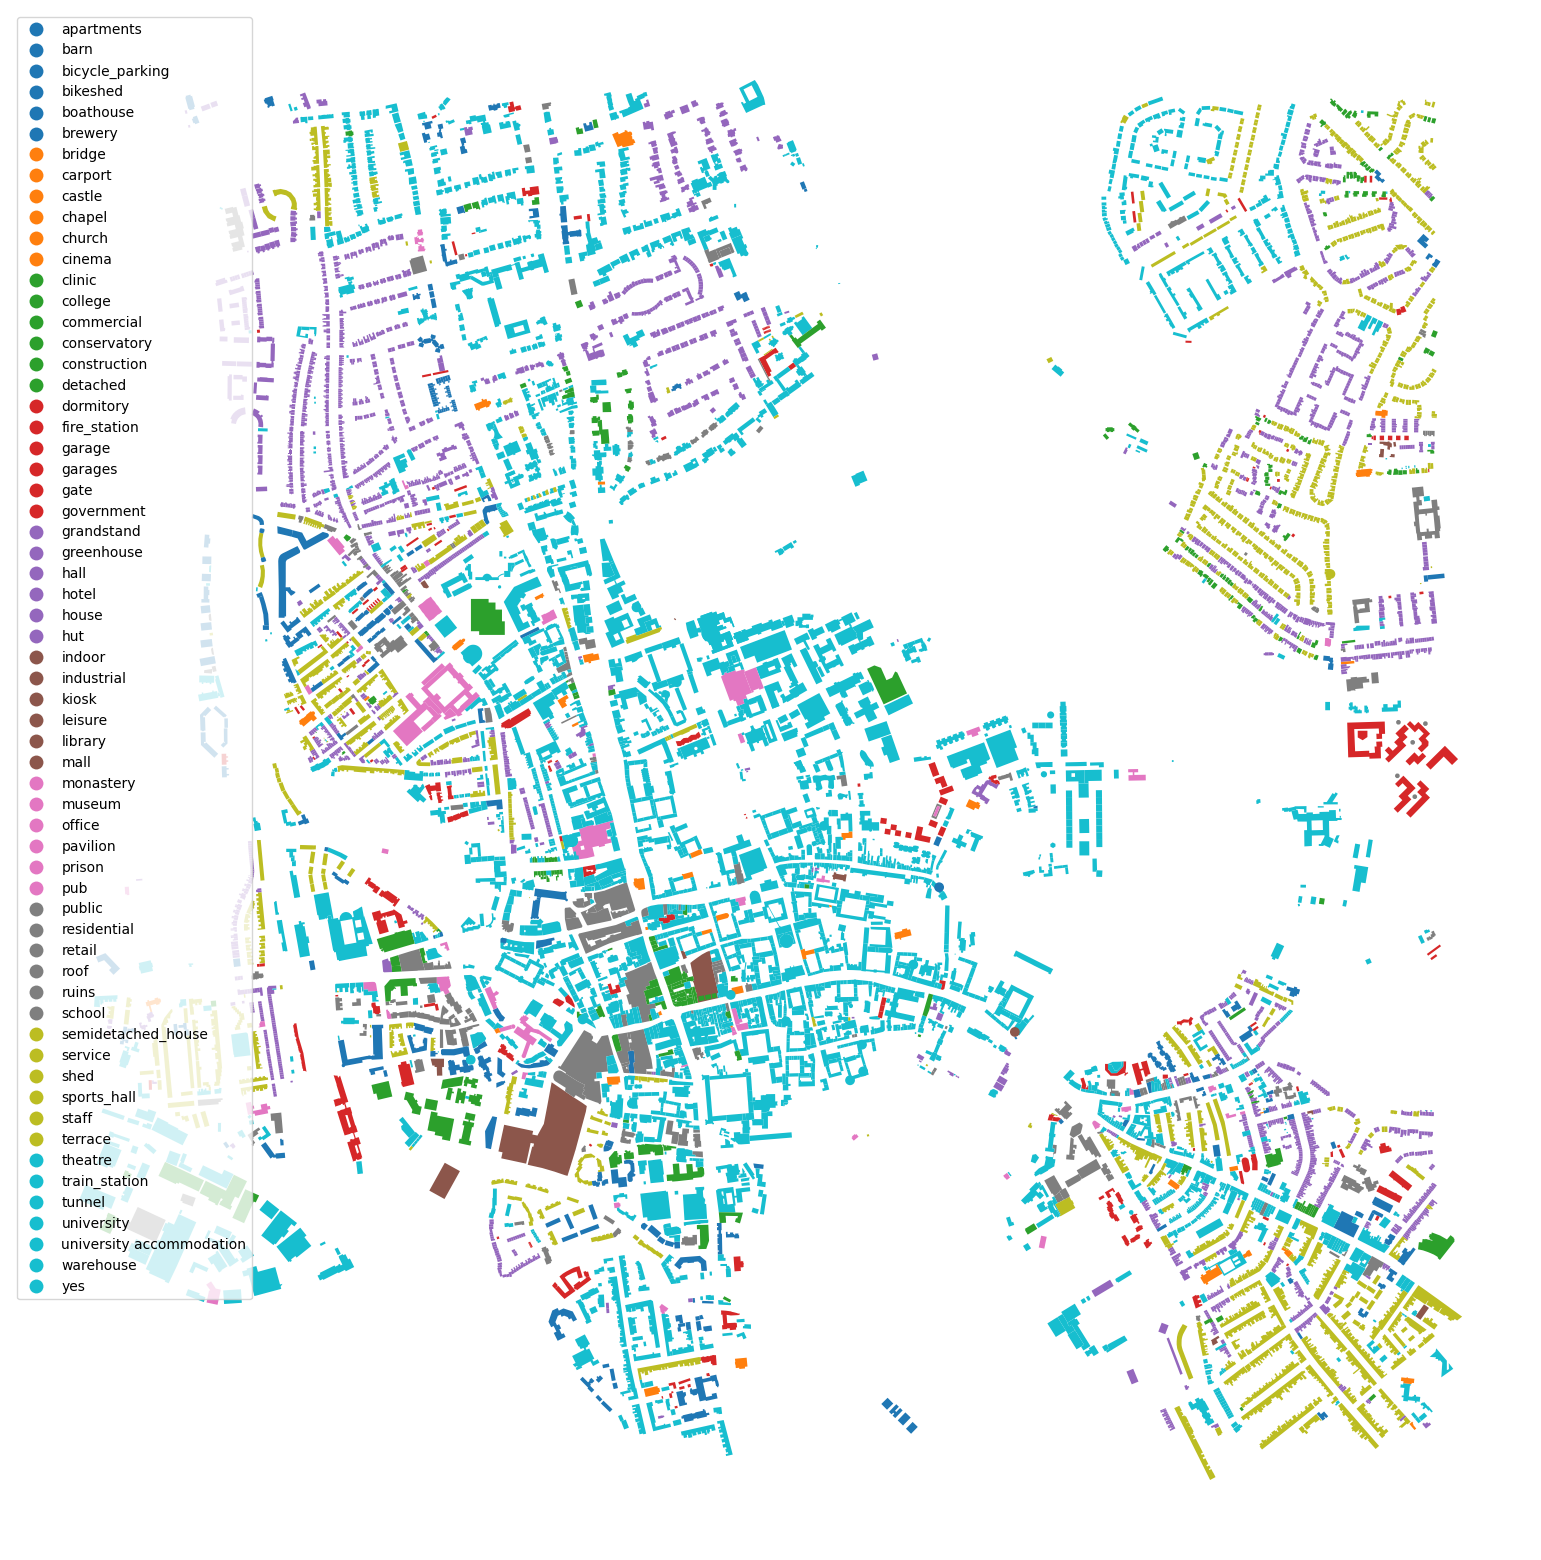

In [13]:
ax = buildings.plot(column='building', figsize=(20, 20), legend=True)
ax.set_axis_off()

**Exercise**

Now that we have shown you how to build a query to OpenStreetMap using `custom_filter`, see if you can do one yourself for the city of your choosing.

1. Look at this [table](https://wiki.openstreetmap.org/wiki/Map_features) that shows the names of OSM features
2. Substitute some of those into the query above
4. Make sure to do one query that gets amenities, like restaurants or cafes and do another for a class of road

Hint: points of interest, like amenities, come from `geometries_from_*` rather than `graph_from_*`. Use the "tags" field to choose what kinds of features you want to download in this function.

---

Something that may be important to your work will be distinguishing "motorway", "primary", "secondary", "tertiary" roads as well as downloading "footpath". Another thing that OSMnx can do is download amenities, which is important to spatial interaction modelling: amenities can take the place of population at destination when we try to model the attractiveness.

## Part II Percolation and accessibility
In this section, we will conduct some analysis using obtained spatial network data.

### 3. Percolation analysis
This section will apply percolation clustering analysis to the street network.

Percolation can be used to identify the clusters of areas that are connected within a certain distance threshold. The process consists of a series of thresholds of the network, in which weak links get disconnected. For each threshold, different subgraphs emerge as the network starts to disconnect. The percolation threshold is the point at which the network transitions from a collection of isolated clusters to a single connected cluster.

#### **Step 1** Transforming to an Undirected Graph

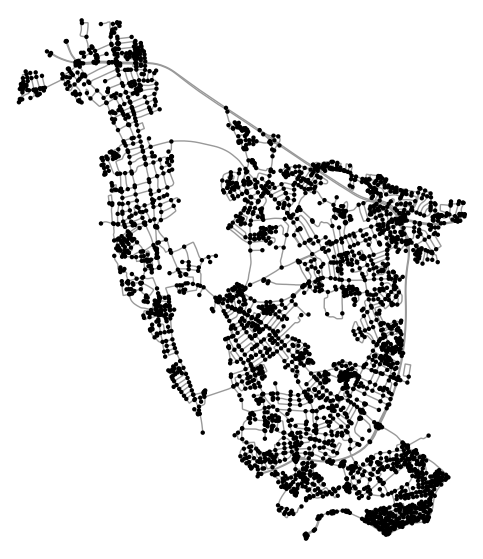

In [14]:
# convert your MultiDiGraph to an undirected MultiGraph
G2 = ox.convert.to_undirected(G1)

fig, ax = plt.subplots(figsize=(12,7))
fig, ax = ox.plot_graph(G2,
                        node_color='k',
                        node_size = 10,
                        ax=ax)

In [15]:
ox.basic_stats(G1)

{'n': 3400,
 'm': 7563,
 'k_avg': 4.448823529411765,
 'edge_length_total': 671874.4082187448,
 'edge_length_avg': 88.83702343233436,
 'streets_per_node_avg': 2.3841176470588237,
 'streets_per_node_counts': {0: 0, 1: 1107, 2: 28, 3: 2119, 4: 144, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.3255882352941176,
  2: 0.00823529411764706,
  3: 0.6232352941176471,
  4: 0.042352941176470586,
  5: 0.000588235294117647},
 'intersection_count': 2293,
 'street_length_total': 362427.99802467675,
 'street_segment_count': 4041,
 'street_length_avg': 89.68770057527264,
 'circuity_avg': 1.0631870001792152,
 'self_loop_proportion': 0.004949269982677555}

In [16]:
ox.basic_stats(G2)

{'n': 3400,
 'm': 4041,
 'k_avg': 2.3770588235294117,
 'edge_length_total': 362427.99802467675,
 'edge_length_avg': 89.68770057527264,
 'streets_per_node_avg': 2.3841176470588237,
 'streets_per_node_counts': {0: 0, 1: 1107, 2: 28, 3: 2119, 4: 144, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.3255882352941176,
  2: 0.00823529411764706,
  3: 0.6232352941176471,
  4: 0.042352941176470586,
  5: 0.000588235294117647},
 'intersection_count': 2293,
 'street_length_total': 362427.99802467675,
 'street_segment_count': 4041,
 'street_length_avg': 89.68770057527264,
 'circuity_avg': 1.0631870001792152,
 'self_loop_proportion': 0.004949269982677555}

#### **Step 2** Checking Edges & Nodes

In [17]:
# From Graph to GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G2)
nodes

y         x  street_count        bc highway  \
osmid                                                              
213302       51.762768 -1.182520             3  0.009609     NaN   
213309       51.762780 -1.181226             3  0.000000     NaN   
213313       51.762403 -1.191741             3  0.014442     NaN   
213315       51.762825 -1.195089             3  0.009776     NaN   
213318       51.763100 -1.196393             3  0.067893     NaN   
...                ...       ...           ...       ...     ...   
12626068933  51.768062 -1.232281             4  0.045948     NaN   
12648261509  51.749934 -1.243999             3  0.136485     NaN   
12691966215  51.721360 -1.210760             1  0.000000     NaN   
12731686912  51.718270 -1.205033             1  0.000000     NaN   
12847479777  51.771324 -1.212362             1  0.000000     NaN   

                              geometry  
osmid                                   
213302       POINT (-1.18252 51.76277)  
213309       POINT (-1.18123 51.76278)  
213313        POINT (-1.19174 51.7624)  
213315       POINT (-1.19509 51.76282)  
213318        POINT (-1.19639 51.7631)  
...                                ...  
12626068933  POINT (-1.23228 51.76806)  
12648261509    POINT (-1.244 51.74993)  
12691966215  POINT (-1.21076 51.72136)  
12731686912  POINT (-1.20503 51.71827)  
12847479777  POINT (-1.21236 51.77132)  

[3400 rows x 6 columns]

In [18]:
edges

osmid      highway   lanes  \
u           v           key                                                 
213302      10069541058 0                  130896382        trunk       3   
            4824903387  0                  490315168  residential     NaN   
            221711931   0     [1202375321, 32567948]        trunk  [2, 3]   
213309      8399368007  0                  148359466        trunk       2   
            8399292860  0                  904416096  residential     NaN   
...                                              ...          ...     ...   
12386394699 12386411719 0                 1339064419  residential     NaN   
12386411701 12386411719 0                 1339064424  residential     NaN   
12386411712 12386411719 0                 1339064424  residential     NaN   
12386411716 12386411719 0                 1339064420  residential     NaN   
12504631421 12512297576 0    [1351589144, 971461539]  residential     NaN   

                            maxspeed  oneway  ref reversed      length  \
u           v           key                                              
213302      10069541058 0     50 mph    True  A40    False   37.772497   
            4824903387  0     50 mph    True  NaN    False   40.669583   
            221711931   0     50 mph    True  A40    False  204.145473   
213309      8399368007  0     50 mph    True  A40    False   40.878743   
            8399292860  0     50 mph    True  NaN    False   42.829431   
...                              ...     ...  ...      ...         ...   
12386394699 12386411719 0        NaN   False  NaN    False  176.983835   
12386411701 12386411719 0        NaN   False  NaN    False   43.475189   
12386411712 12386411719 0        NaN   False  NaN     True   80.066768   
12386411716 12386411719 0        NaN   False  NaN    False   16.617133   
12504631421 12512297576 0        NaN   False  NaN     True   95.015714   

                                                                      geometry  \
u           v           key                                                      
213302      10069541058 0    LINESTRING (-1.18252 51.76277, -1.18205 51.762...   
            4824903387  0    LINESTRING (-1.18252 51.76277, -1.18234 51.762...   
            221711931   0    LINESTRING (-1.18542 51.7624, -1.18527 51.7624...   
213309      8399368007  0    LINESTRING (-1.18123 51.76278, -1.18171 51.762...   
            8399292860  0    LINESTRING (-1.18123 51.76278, -1.18148 51.762...   
...                                                                        ...   
12386394699 12386411719 0    LINESTRING (-1.27022 51.79452, -1.27016 51.794...   
12386411701 12386411719 0    LINESTRING (-1.27022 51.79452, -1.27009 51.794...   
12386411712 12386411719 0    LINESTRING (-1.27022 51.79452, -1.27128 51.794...   
12386411716 12386411719 0    LINESTRING (-1.27022 51.79452, -1.27026 51.79467)   
12504631421 12512297576 0    LINESTRING (-1.21629 51.7708, -1.21594 51.7711...   

                                    from           to                 name  \
u           v           key                                                  
213302      10069541058 0         213302  10069541058                  NaN   
            4824903387  0         213302   4824903387      Merewood Avenue   
            221711931   0      221711931       213302                  NaN   
213309      8399368007  0         213309   8399368007          London Road   
            8399292860  0         213309   8399292860      Merewood Avenue   
...                                  ...          ...                  ...   
12386394699 12386411719 0    12386411719  12386394699  Minna Frances Close   
12386411701 12386411719 0    12386411719  12386411701      Frideswide Road   
12386411712 12386411719 0    12386411719  12386411712      Frideswide Road   
12386411716 12386411719 0    12386411719  12386411716   Middleton Crescent   
12504631421 12512297576 0    12512297576  12504631421        Foxtail Drive   



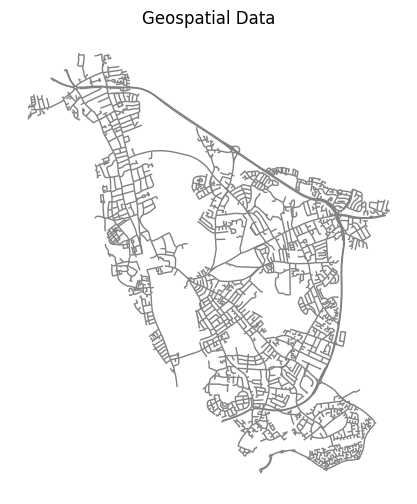

In [19]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# You can customise the plot with different options
edges.plot(ax=ax, color='grey', linewidth=1, edgecolor='black')

# Optionally, you can add titles and labels
ax.set_title('Geospatial Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_axis_off()

# Show the plot
plt.show()

In [20]:
# Get a simplified node list
data_coords = nodes[["x","y"]]
data_coords['id_point'] = data_coords.index
data_coords

/tmp/ipython-input-20-3778995802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coords['id_point'] = data_coords.index


x          y     id_point
osmid                                        
213302      -1.182520  51.762768       213302
213309      -1.181226  51.762780       213309
213313      -1.191741  51.762403       213313
213315      -1.195089  51.762825       213315
213318      -1.196393  51.763100       213318
...               ...        ...          ...
12626068933 -1.232281  51.768062  12626068933
12648261509 -1.243999  51.749934  12648261509
12691966215 -1.210760  51.721360  12691966215
12731686912 -1.205033  51.718270  12731686912
12847479777 -1.212362  51.771324  12847479777

[3400 rows x 3 columns]

#### **Step 3** Percolation
The process consists of a series of thresholds of the network. Through setting different distance thresholds, different subgraphs emerge as the network starts to disconnect.

Note that the thresholds are NOT universal. Also that the networks from the OSM are incomplete, hence more detailed, referring to smaller streets being present, will only be given in cities where the effort to map those streets has been put into it. Hence, different distances will be found for the transitions in different cities.

First let us define the vector containing the percolation thresholds of interest

In [21]:
rmin = 10  # 10 metres as the starting distance threshold
rmax = 1001 # 1000 metres as the ending threshold
r0 = np.arange(rmin, rmax, 10)
n_loops = len(r0)

# file_clust_size = 'cluster_size.txt'
# with open(file_clust_size, 'w') as file:
#     file.write('threshold	 size
# ')

Define the thresholds to plot the 10 largest clusters on maps

In [22]:
jumps_2plot = [90,160,200,210,260,290,330]

In [23]:
# Define the colours for the top 10 clusters
top10 = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'brown']

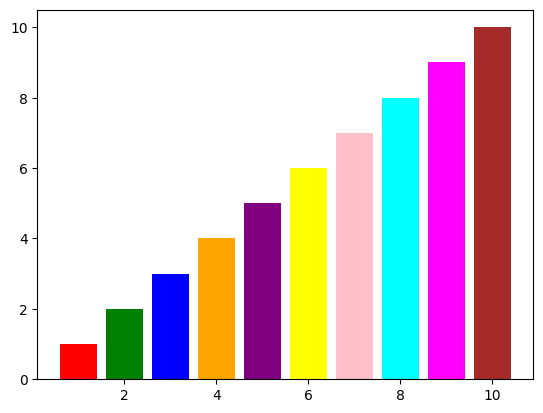

In [24]:
# Visualise the colours
plt.bar(range(1, 11), range(1, 11), color=top10)
plt.show()

In [25]:
# Obtain the node counts of the network
size_net = G2.number_of_nodes()
size_net


3400

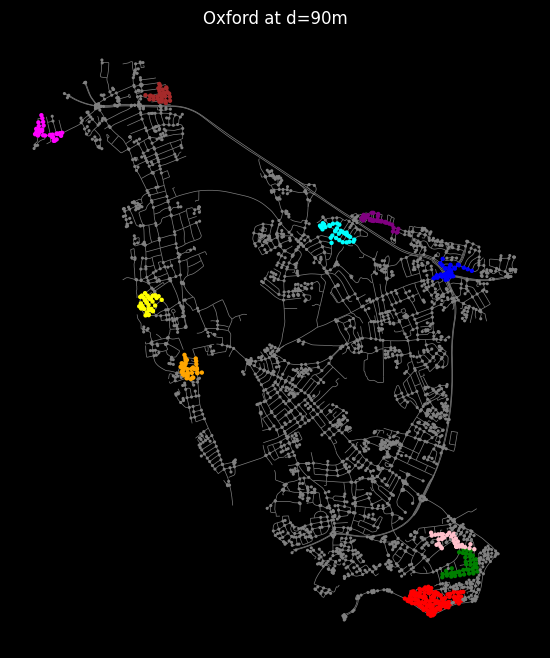

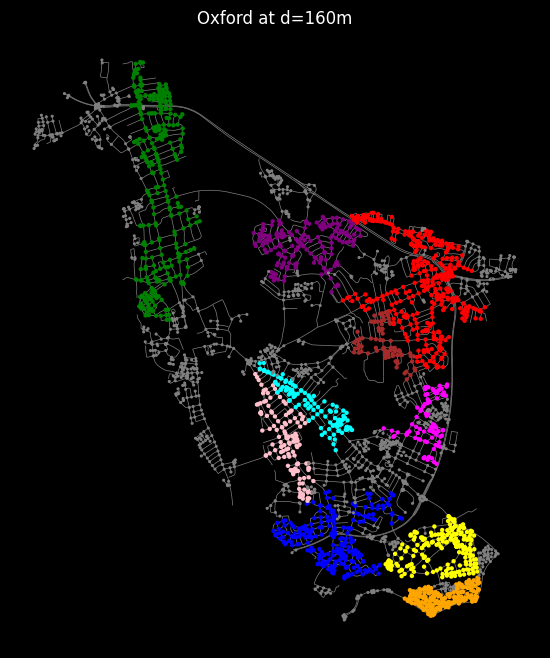

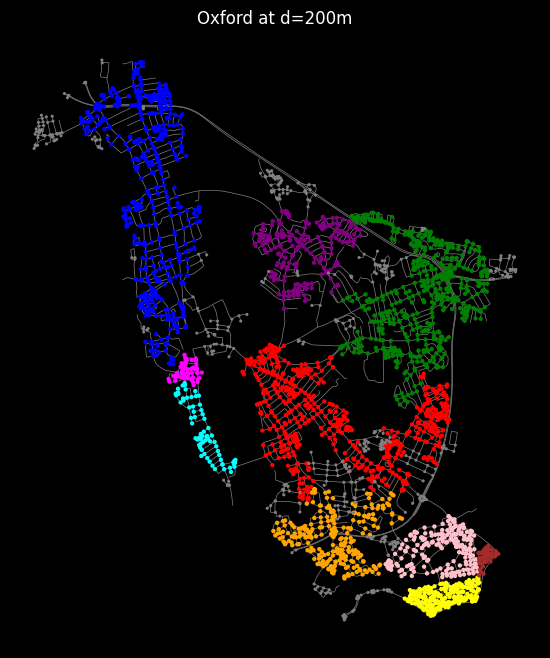

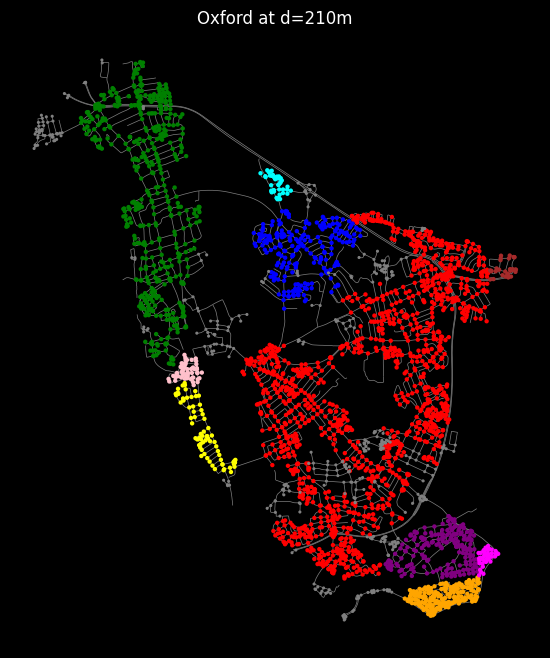

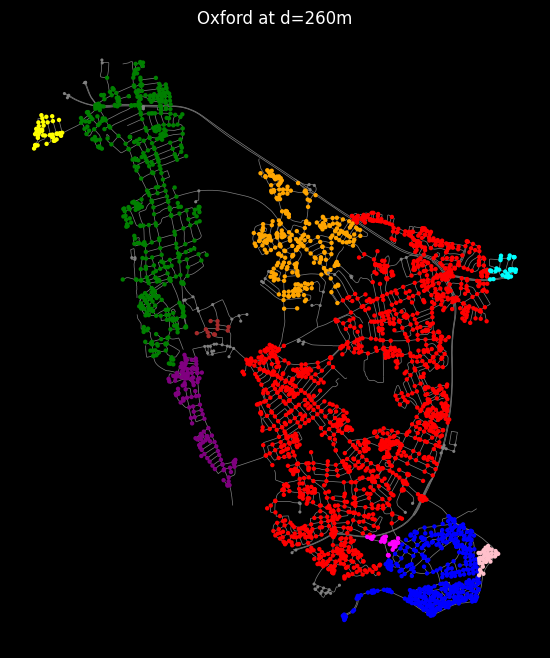

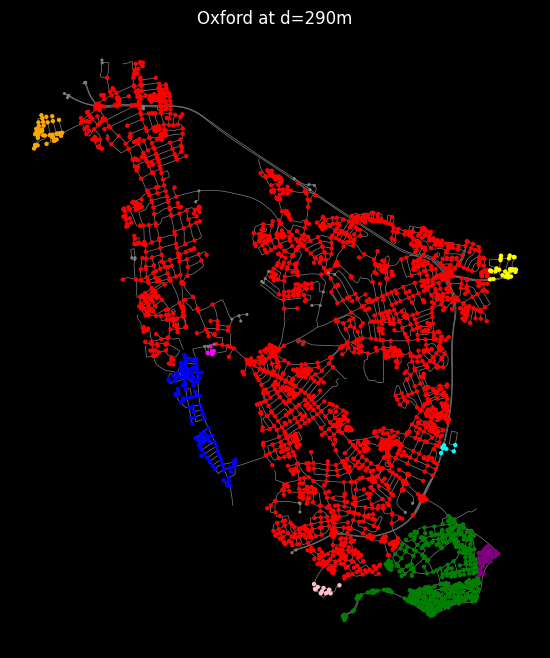

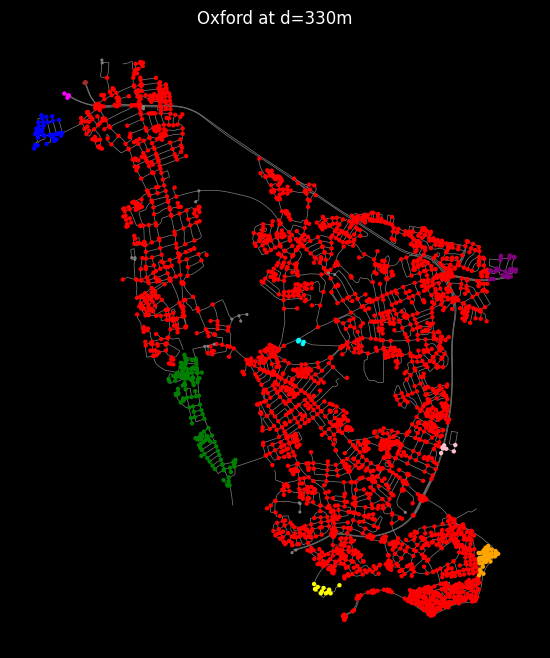

In [26]:
# Percolation process & plot
for i_t in r0:
    # Find subgraph such that all weights <= threshold r0
    edges_1 = [(u, v, d) for u, v, d in G2.edges(data=True) if d['length'] <= i_t]
    g = nx.Graph()
    g.add_edges_from(edges_1)
    g.remove_nodes_from(list(nx.isolates(g)))

    # Take subcomponents
    membclusters = {node: cid for cid, component in enumerate(nx.connected_components(g)) for node in component}

    m = pd.DataFrame(list(membclusters.items()), columns=["id_point", "id_cluster"])

    table_data = m['id_cluster'].value_counts()

    # Largest connected component
    LCC = table_data.max()
    LCC_p = LCC / size_net
    v_LCC = [i_t, LCC, LCC_p]

    if i_t == rmin:
        v_LCC_t = np.array([v_LCC])
    else:
        v_LCC_t = np.vstack([v_LCC_t, v_LCC])

    sorted_table = table_data.sort_values(ascending=False)

    if i_t in jumps_2plot:

        # Assign colours
        list_clusts = sorted_table.reset_index()
        list_clusts.columns = ["id_cluster", "n_points"]
        list_clusts['colour'] = 'grey'
        list_clusts.loc[:9, 'colour'] = top10
        list_clusts['size'] = 0.1
        list_clusts.loc[:9, 'size'] = 0.2

        total_list = pd.merge(list_clusts, m, on="id_cluster")

        points_coords_cols = pd.merge(total_list, data_coords, on="id_point")


        # # Plot the original street network system  as background
        # fig, ax = plt.subplots(1, 1, figsize=(10, 8),facecolor='black')
        # edges.plot(ax=ax, color='grey', edgecolor='black')

        # # plt.savefig(file_map, height=850, width=1000)
        # plt.figure(figsize=(10, 8), facecolor='black')
        # plt.scatter(points_coords_cols['x'], points_coords_cols['y'], s=points_coords_cols['size'] * 50, c=points_coords_cols['colour'], edgecolor='none')
        # plt.title(f"Oxford at d={i_t}m", color='white')
        # plt.axis('off')
        # plt.show()
        # # plt.savefig(file_map)
        # # plt.close()

        # Plot the original street network system as background
        fig, ax = plt.subplots(1, 1, figsize=(10, 8), facecolor='black')


        # Plot points
        ax.scatter(points_coords_cols['x'], points_coords_cols['y'], s=points_coords_cols['size'] * 50, c=points_coords_cols['colour'], edgecolor='none',zorder = 1)

         # Plot edges geometry as background
        edges.plot(ax=ax, color='grey', linewidth=0.5, zorder = 0)

        ax.set_title(f"Oxford at d={i_t}m", color='white')
        ax.axis('off')

        plt.show()


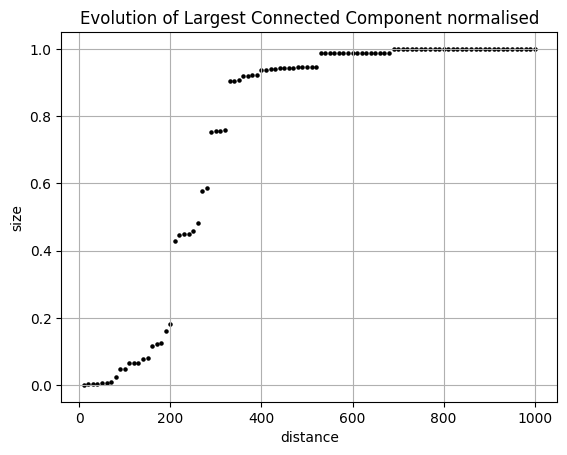

In [27]:
import matplotlib.pyplot as plt

plt.figure(facecolor='white')

plt.scatter(v_LCC_t[:, 0], v_LCC_t[:, 2], c='black', s=5)
plt.grid(True)

plt.xlabel("distance")
plt.ylabel("size")
plt.title("Evolution of Largest Connected Component normalised")

plt.show()


### 4. Retail Accessibility in Oxford

We are going to use the street network to compute measures of accessibility. To do this, we will lean on "Dijkstra's algorithm", which is a method for finding the shortest path between two points in a graph. In this case, the graph is the street network, and the points are intersections of streets.

**Dijkstra's Algorithm Steps:**

1. Initialise all nodes with infinite distance; set starting node distance to 0
2. Select the unvisited node with minimum distance
3. Mark the selected node as visited
4. Update distances to all adjacent unvisited nodes
5. Repeat steps 2-4 until destination is reached or all nodes are visited

[**N.B.** When you are working with very large graphs, you might try the A* algorithm, which is a more efficient version of Dijkstra's algorithm. It limits the search space by establishing a maximum "detour" beyond the direct path, focusing only on promising routes. So you can imagine, if you are trying to get from Berlin to Rome, your street network might be all of Europe but we could throw out the possibility of going through Athens or something.]

In [28]:
# Additional imports for this section
import colorcet as cc
import re

#### Step 1: Preparation
Let's start by getting the data, slightly different from the previous one because we want to see **walking** behaviour.

In [29]:
# Grab the street network for our area of interest, this time for walking
G_walk = ox.graph.graph_from_place('Oxford, England, United Kingdom', network_type='walk')

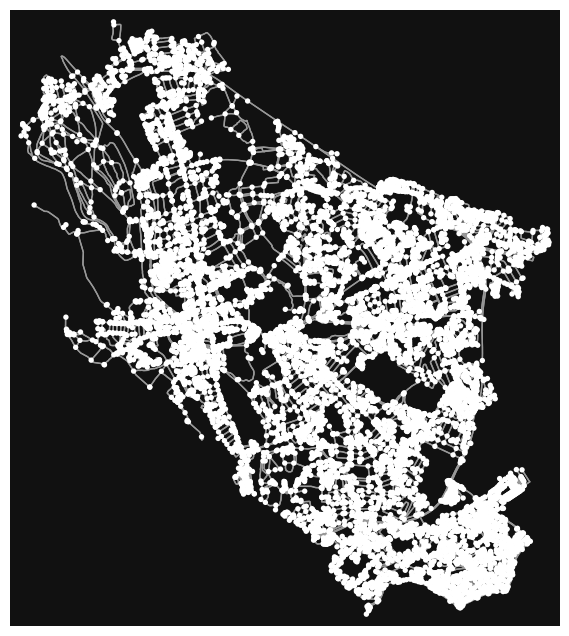

In [30]:
# Remember how to plot the graph
fig, ax = ox.plot_graph(G_walk)

In [31]:
# Get the administrative boundary of the area
area = ox.geocode_to_gdf('Oxford, England, United Kingdom')

In [32]:
area.explore()

For this section, we are going to use data on grocery stores from Geolytix.

In [33]:
wd = './OSSEN-Workshop/'
retail = pd.read_csv(wd + "geolytix_retailpoints_v34_202412.csv")

retail = gpd.GeoDataFrame(retail, geometry=gpd.points_from_xy(retail['long_wgs'], retail['lat_wgs']), crs="EPSG:4326")
retail = retail[retail['geometry'].within(area.loc[0, 'geometry'])]
retail.head()

id                retailer                 fascia  \
3806  1010012709                Waitrose               Waitrose   
3807  1010008939  The Co-operative Group  The Co-operative Food   
3808  1010017001                    Spar                   Spar   
3812  1010005419                   Tesco          Tesco Express   
3814  1010022000                    Cook                   Cook   

                           store_name                             add_one  \
3806      Waitrose Oxford Botley Road                         Botley Road   
3807             Co-op Cherwell Drive                   22 Cherwell Drive   
3808                Spar - Headington              10-12 Underhill Circus   
3812  Tesco Oxford St Aldates Express                      75 St Aldate's   
3814                      Cook Oxford  237 Banbury Road Summertown Oxford   

     add_two    town          suburb postcode  long_wgs    lat_wgs  \
3806     NaN  Oxford          Botley  OX2 0HH -1.280490  51.753060   
3807     NaN  Oxford         Manston  OX3 0LY -1.231638  51.767982   
3808     NaN  Oxford      Headington  OX3 9LU -1.195715  51.767426   
3812     NaN  Oxford  Central Oxford  OX1 1RA -1.256797  51.748665   
3814     NaN  Oxford    North Oxford  OX2 7HN -1.265136  51.777365   

              bng_e          bng_n      pqi   open_date  \
3806  449763.982172  206285.667426  Rooftop  20151015.0   
3807  453118.690789  207979.618569  Rooftop         NaN   
3808  455598.250254  207944.438083  Rooftop         NaN   
3812  451404.399689  205813.200175  Rooftop         NaN   
3814  450796.628871  208999.411366  Rooftop         NaN   

                                   size_band       county  \
3806  15,069 < 30,138 ft2 (1,400 < 2,800 m2)  Oxfordshire   
3807                     < 3,013 ft2 (280m2)  Oxfordshire   
3808                     < 3,013 ft2 (280m2)  Oxfordshire   
3812                     < 3,013 ft2 (280m2)  Oxfordshire   
3814                     < 3,013 ft2 (280m2)  Oxfordshire   

                       geometry  
3806  POINT (-1.28049 51.75306)  
3807  POINT (-1.23164 51.76798)  
3808  POINT (-1.19571 51.76743)  
3812   POINT (-1.2568 51.74867)  
3814  POINT (-1.26514 51.77737)

In [34]:
# How many retail locations are there?
retail.shape

(52, 18)

In [35]:
# for some of the plotting, it would be nice to have an integer value for square footage
import re
def extract_square_meter(x):
    # natch the square meter value, even if there is a range
    match = re.search(r'\((\d{1,3}(?:,\d{3})*)\s*(?:<\s*\d{1,3}(?:,\d{3})*)?\s*m2\)', x)
    if match:
        # extract the first value in the range, or the single value
        square_meter_str = match.group(1).replace(",", "")
        return int(square_meter_str)
    return None

retail['square_meters'] = retail['size_band'].apply(lambda x: extract_square_meter(x))
retail.head()

id                retailer                 fascia  \
3806  1010012709                Waitrose               Waitrose   
3807  1010008939  The Co-operative Group  The Co-operative Food   
3808  1010017001                    Spar                   Spar   
3812  1010005419                   Tesco          Tesco Express   
3814  1010022000                    Cook                   Cook   

                           store_name                             add_one  \
3806      Waitrose Oxford Botley Road                         Botley Road   
3807             Co-op Cherwell Drive                   22 Cherwell Drive   
3808                Spar - Headington              10-12 Underhill Circus   
3812  Tesco Oxford St Aldates Express                      75 St Aldate's   
3814                      Cook Oxford  237 Banbury Road Summertown Oxford   

     add_two    town          suburb postcode  long_wgs    lat_wgs  \
3806     NaN  Oxford          Botley  OX2 0HH -1.280490  51.753060   
3807     NaN  Oxford         Manston  OX3 0LY -1.231638  51.767982   
3808     NaN  Oxford      Headington  OX3 9LU -1.195715  51.767426   
3812     NaN  Oxford  Central Oxford  OX1 1RA -1.256797  51.748665   
3814     NaN  Oxford    North Oxford  OX2 7HN -1.265136  51.777365   

              bng_e          bng_n      pqi   open_date  \
3806  449763.982172  206285.667426  Rooftop  20151015.0   
3807  453118.690789  207979.618569  Rooftop         NaN   
3808  455598.250254  207944.438083  Rooftop         NaN   
3812  451404.399689  205813.200175  Rooftop         NaN   
3814  450796.628871  208999.411366  Rooftop         NaN   

                                   size_band       county  \
3806  15,069 < 30,138 ft2 (1,400 < 2,800 m2)  Oxfordshire   
3807                     < 3,013 ft2 (280m2)  Oxfordshire   
3808                     < 3,013 ft2 (280m2)  Oxfordshire   
3812                     < 3,013 ft2 (280m2)  Oxfordshire   
3814                     < 3,013 ft2 (280m2)  Oxfordshire   

                       geometry  square_meters  
3806  POINT (-1.28049 51.75306)           1400  
3807  POINT (-1.23164 51.76798)            280  
3808  POINT (-1.19571 51.76743)            280  
3812   POINT (-1.2568 51.74867)            280  
3814  POINT (-1.26514 51.77737)            280

In [36]:
# Convert graph to GeoDataFrames
nodes_walk, edges_walk = ox.graph_to_gdfs(G_walk)

Text(0.5, 1.0, 'Retail in Oxford')

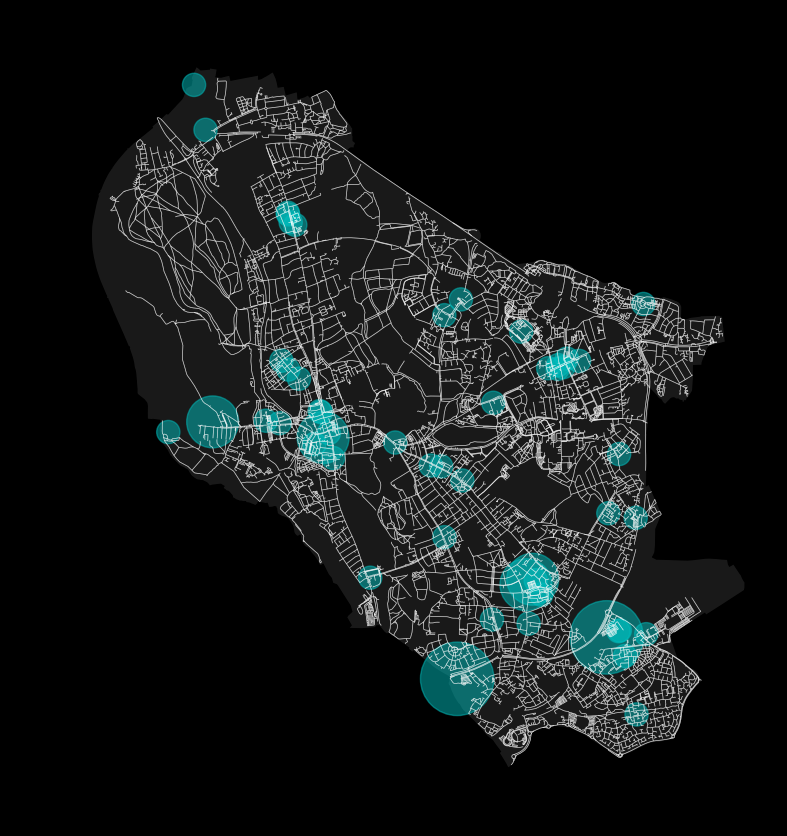

In [37]:
# Visualise the grocery stores on the map
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
area.plot(ax=ax, facecolor='w', alpha=0.1)
edges_walk.plot(color='w', ax=ax, linewidth=0.5, alpha=0.5)
retail.plot(color='c', ax=ax, markersize='square_meters', alpha=0.5)
ax.set_facecolor('k')
ax.set_title('Retail in Oxford')

#### Step 2: Navigation & Routing

/tmp/ipython-input-38-1572342722.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Origin_point = buildings[buildings['name']=='Deneke'].geometry.centroid
/tmp/ipython-input-38-1572342722.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  destination_point = retail.sample(1, random_state=33).geometry.centroid
/tmp/ipython-input-38-1572342722.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Origin = ox.nearest_nodes(G_walk, Origin_point.x[0], Origin_point.y[0])


2361900476
3018165569


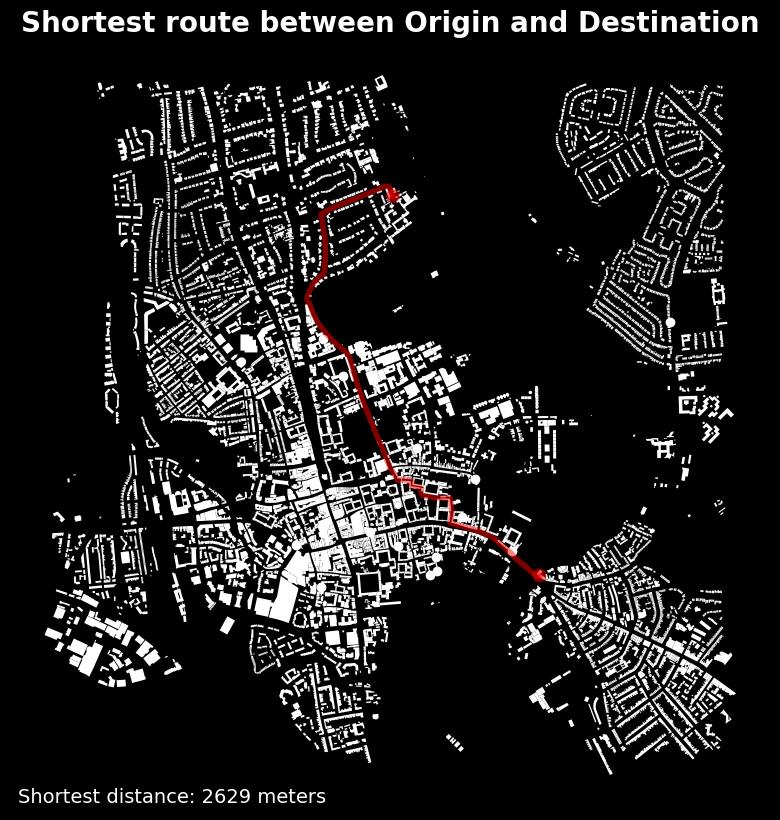

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Shortest route between Origin and Destination'}>)

In [38]:
Origin_point = buildings[buildings['name']=='Deneke'].geometry.centroid
destination_point = retail.sample(1, random_state=33).geometry.centroid


Origin = ox.nearest_nodes(G_walk, Origin_point.x[0], Origin_point.y[0])
print(Origin)

destination = ox.nearest_nodes(G_walk, destination_point.x, destination_point.y)[0]
print(destination)

# get the shortest path between the two nodes
route = nx.shortest_path(G_walk, Origin, destination, weight='length')
route_length = nx.shortest_path_length(G_walk, Origin, destination, weight='length')

# plot the route
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='k', subplot_kw=dict(aspect='equal'))

# clean it up
ax.set_facecolor('k')
ax.set_axis_off()

# add a title
ax.set_title('Shortest route between Origin and Destination', fontsize=20, color='w', fontweight='bold')

# Buildings as background
buildings.plot(color='w', ax=ax)

# Add the shortest distance as text on the plot
ax.text(0.01, 0.01, f'Shortest distance: {route_length:.0f} meters',
        transform=ax.transAxes, color='w', fontsize=14,
        bbox=dict(facecolor='k', alpha=0.5, edgecolor='none'))

# Plot the routing results
ox.plot_graph_route(G_walk, route, node_size=2, ax=ax)

**Bonus**:

Select the retail location closest to our current place, Lady Margaret Hall, and plot the shortest route from this location to the selected retail location.

Here we will compute all the distances from the origin to all retail locations.

In [ ]:
# 1. Define the origin point at Lady Margaret Hall
place_name = 'Deneke'
Origin_point = buildings[buildings['name']=='Deneke'].geometry.centroid.iloc[0]

# 2. Find the nearest node in the graph to the origin
origin_node = ox.nearest_nodes(G_walk, Origin_point.x, Origin_point.y)

# 3. Find the nearest retail location to the origin node
# Get all possible destination nodes (from the retail dataframe)
destination_nodes = retail['nodes'].unique()

# Calculate shortest path length from origin to all other nodes
lengths = nx.single_source_dijkstra_path_length(G_walk, origin_node, weight='length')

# Find the closest destination node among the retail locations
min_dist = float('inf')
destination_node = None

for node in destination_nodes:
    if node in lengths and lengths[node] < min_dist:
        min_dist = lengths[node]
        destination_node = node

# 4. Get the shortest path between the origin and the selected destination
route = nx.shortest_path(G_walk, origin_node, destination_node, weight='length')

# 5. Plot the route
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='k', subplot_kw=dict(aspect='equal'))
ax.set_facecolor('k')
ax.set_axis_off()
ax.set_title('Shortest route between Origin and Destination', fontsize=20, color='w', fontweight='bold')
buildings.plot(color='w', ax=ax)

# Add the shortest distance as text on the plot
ax.text(0.01, 0.01, f'Shortest distance: {min_dist:.0f} meters',
        transform=ax.transAxes, color='w', fontsize=14,
        bbox=dict(facecolor='k', alpha=0.5, edgecolor='none'))

ox.plot_graph_route(G_walk, route, node_size=2, ax=ax, route_color='c')

#### Step 3: Catchment area and distance

In [39]:
# Get the nearest network node to each point
# Note: using geometry.x and .y is more robust for GeoDataFrames
retail['nodes'] = ox.nearest_nodes(G_walk, retail.geometry.x, retail.geometry.y)

In [40]:
retail['nodes'].to_numpy()

array([ 1327325839, 12648219776,   364838379,  1325805098,  1760463838,
        2268660024,  1332088185,  9381817252,  1754925277,   696696141,
       12807467393,    29063353,    16640069, 11507905365,  1383563057,
         355000537,   639133512,      213885,  1324797856,  2059871997,
       12912853047,  1327335133,  1324697093,  1281316811,  3178941726,
        1024074718,  1324797861, 10606112694,   279890181,  1718362871,
        9706884372,   401868577,  1491571445,  1445455800,     6524574,
       12139650329,  1324651559,    29063354,   529861992,  1760463842,
        1273290289,  7792057562, 11780564742,  1335956590,  3018165569,
         485607761,   485607761,  1947338610,  2313105548,  2934506667,
        1209407636,  6991912907])

In [41]:
# Each node has an ID and coordinate
# G_walk.nodes(data=True) # This can be a very long output, let's not print it all
list(G_walk.nodes(data=True))[:5]

[(213309, {'y': 51.7627797, 'x': -1.1812265, 'street_count': 4}),
 (213313, {'y': 51.762403, 'x': -1.191741, 'street_count': 3}),
 (213315, {'y': 51.7628248, 'x': -1.195089, 'street_count': 3}),
 (213319, {'y': 51.7627696, 'x': -1.1964652, 'street_count': 3}),
 (213320, {'y': 51.7627214, 'x': -1.1970113, 'street_count': 3})]

A Voronoi diagram assigns points to a set of seed or generator points according to proximity.

In [42]:
# Get the shortest paths from all the nodes to all the entrance nodes
# This can take a moment
%time lines = nx.multi_source_dijkstra_path(G_walk, set(retail['nodes'].to_numpy()), weight='length')
# Voronoi cells creates a voronoi using the network rather than euclidean distance
%time cells = nx.voronoi_cells(G_walk, set(retail['nodes'].to_numpy()), weight='length')

CPU times: user 95.5 ms, sys: 1.98 ms, total: 97.5 ms
Wall time: 96.8 ms
CPU times: user 106 ms, sys: 14 µs, total: 106 ms
Wall time: 105 ms


For more actions on the Dijkstra algorithm, see `nx.dijkstra_*` and its many endings.

In [43]:
cells_df_list = [pd.DataFrame({'parent': x[0], 'child': list(x[1])}) for x in cells.items()]
merged = pd.concat(cells_df_list).merge(nodes_walk, left_on='child', right_on='osmid', how='left')

In [44]:
merged.head()

parent       child          y         x  street_count highway  ref  \
0  12648219776  8894900236  51.771524 -1.222227             3     NaN  NaN   
1  12648219776  1493403698  51.777067 -1.236267             1     NaN  NaN   
2  12648219776  1288235089  51.777097 -1.237178             3     NaN  NaN   
3  12648219776  1288235096  51.777173 -1.237812             1     NaN  NaN   
4  12648219776  1415903324  51.769630 -1.223334             3     NaN  NaN   

                    geometry  
0  POINT (-1.22223 51.77152)  
1  POINT (-1.23627 51.77707)  
2   POINT (-1.23718 51.7771)  
3  POINT (-1.23781 51.77717)  
4  POINT (-1.22333 51.76963)

Text(0.5, 1.0, 'Retail Catchments')

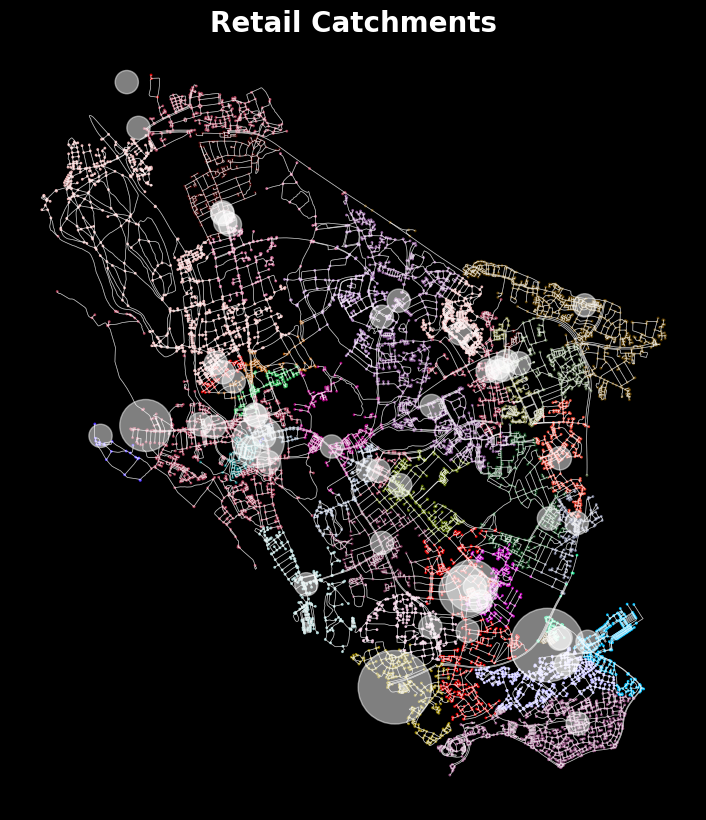

In [45]:
# Plot the edges in black
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
edges_walk.plot(color='w', ax=ax, linewidth=0.5, alpha=0.5)

# Convert the merged cell dataframe to a geodataframe and plot it
gpd.GeoDataFrame(merged,
                 geometry=gpd.points_from_xy(merged['x'], merged['y']),
                 crs=4326).plot('parent', markersize=1, cmap=cc.cm.glasbey_dark, ax=ax)

# Plot the grocery stores in light grey to highlight them
retail.plot(color='w', ax=ax, markersize='square_meters', alpha=0.5)

# Clean it up
ax.set_axis_off()
ax.set_facecolor('k')

# Add a title
ax.set_title('Retail Catchments', fontsize=20, fontweight='bold', color='w')

We have now assigned each intersection to its nearest grocery store.

In [46]:
# Let's check the distances to shops from all nodes
%time lengths = nx.multi_source_dijkstra_path_length(G_walk, set(retail['nodes'].to_numpy()), weight="length")

CPU times: user 85 ms, sys: 0 ns, total: 85 ms
Wall time: 84.6 ms


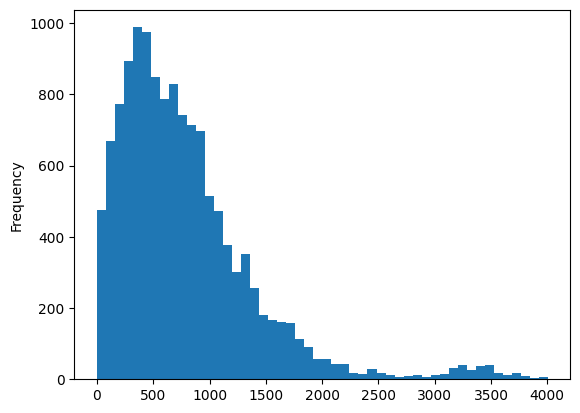

In [47]:
# Make a data frame of the lengths
lengths = pd.DataFrame({'osmid':lengths.keys(), 'distance': lengths.values()})
# There may be some outliers, let's remove nodes that are very far
# We can inspect the distribution to make a better choice
lengths['distance'].plot.hist(bins=50)
plt.show()

In [48]:
# You can set an optional reasonable threshold of walking distance, e.g., 5000 metres
# lengths = lengths[lengths['distance'] < 5000]

In [49]:
# What is the average length?
int(lengths['distance'].mean())

786

In [50]:
# Let us check what is the max distance
int(lengths['distance'].max())

4004

Text(0.5, 1.0, 'Retail Distances')

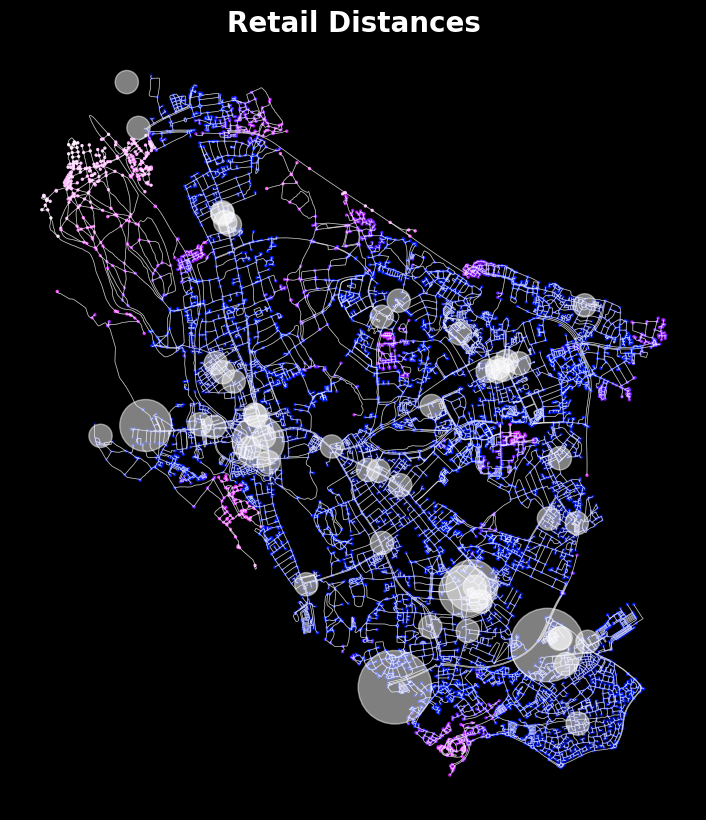

In [51]:
# Same as before but with distance as the column of interest
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
edges_walk.plot(color='w', ax=ax, linewidth=0.5, alpha=0.5)
gpd.GeoDataFrame(merged,
                 geometry=gpd.points_from_xy(merged['x'], merged['y']),
                 crs=4326).merge(lengths,
                                 left_on='child',
                                 right_on='osmid',
                                 how='left').plot('distance', markersize=2, cmap=cc.cm.bmw, ax=ax)

# Plot the grocery stores in light grey to highlight them
retail.plot(color='w', ax=ax, markersize='square_meters', alpha=0.5)

# Clean it up
ax.set_axis_off()
ax.set_facecolor('k')

# Add a title
ax.set_title('Retail Distances', fontsize=20, fontweight='bold', color='w')

**Important:** For a practical application, you will need to be able to create a matrix that contains the distance between all origins and all destinations. What we have done so far assigns each node to its nearest grocery store. You will need to create a matrix that contains the distance between all nodes. This is a bit more complex, but we will guide you through it.

[If you are using a square matrix, which we are not, you can use `nx.all_pairs_dijkstra_path_length`, but this takes a lot of computational power and time.]

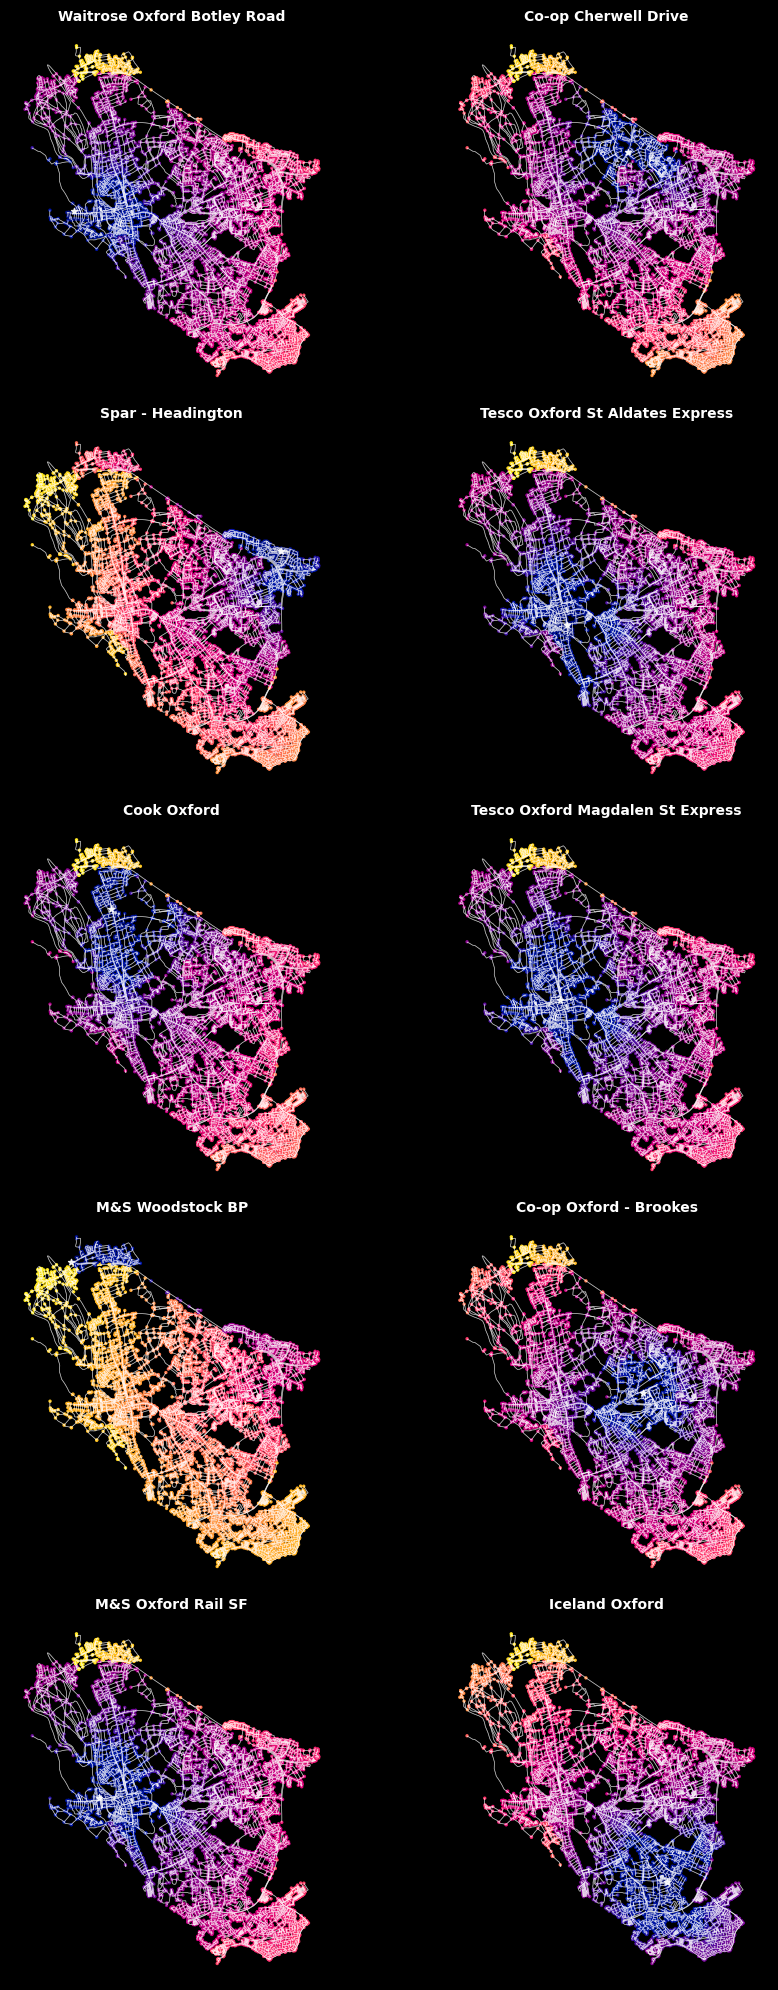

CPU times: user 1min 3s, sys: 666 ms, total: 1min 4s
Wall time: 1min 3s


In [52]:
%%time
distances = {}

# We are only going to plot the top 10 for visualisation purposes
# Let's make sure the 'name' column has no NaNs for titles
retail_named = retail.dropna(subset=['store_name']).reset_index(drop=True)
subset = retail_named.head(10)

fig, axs = plt.subplots(5, 2, figsize=(10, 20), facecolor='k')
axs = axs.ravel()

# For each grocery store, let's get the distance to all nodes, and plot them all
for i, row in subset.iterrows():
    n = row['nodes']
    d = nx.single_source_dijkstra_path_length(G_walk, n, weight='length')
    d = pd.DataFrame({'osmid': d.keys(), 'distance': d.values()})
    distances[n] = d

    # Visualisation of first 10 grocery stores only
    if i < 25:

        edges_walk.plot(color='w', ax=axs[i], linewidth=0.5, alpha=0.5)
        gpd.GeoDataFrame(merged,
                        geometry=gpd.points_from_xy(merged['x'], merged['y']),
                        crs=4326).merge(d,
                                        left_on='child',
                                        right_on='osmid',
                                        how='left').plot('distance', markersize=2, cmap=cc.cm.bmy, ax=axs[i])

        retail[retail['nodes']==n].plot(color='w', ax=axs[i], markersize=20, alpha=0.9, marker='*')
        axs[i].set_axis_off()
        axs[i].set_facecolor('k')
        axs[i].set_title(row['store_name'], fontsize=10, fontweight='bold', color='w')

plt.tight_layout()
plt.show()

**Bonus**:

Select the retail location closest to our current place, Lady Margaret Hall, and plot the shortest route from this location to the selected retail location.

Here we will compute all the distances from the origin to all retail locations.

/tmp/ipython-input-53-3242457342.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Origin_point = buildings[buildings['name']=='Deneke'].geometry.centroid.iloc[0]


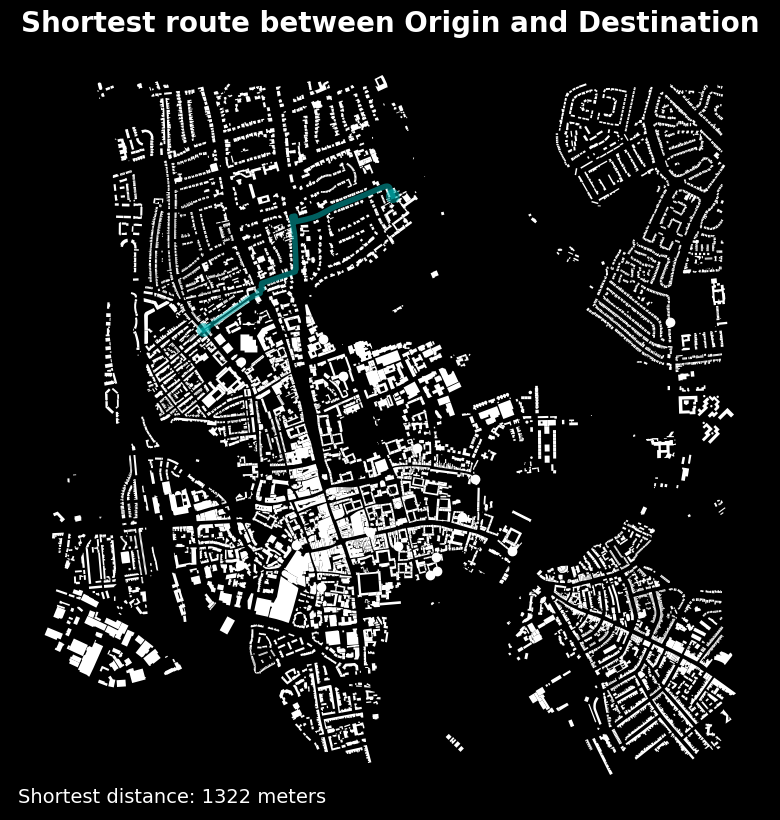

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Shortest route between Origin and Destination'}>)

In [53]:
# 1. Define the origin point
place_name = 'Deneke'
Origin_point = buildings[buildings['name']=='Deneke'].geometry.centroid.iloc[0]

# 2. Find the nearest node in the graph to the origin
origin_node = ox.nearest_nodes(G_walk, Origin_point.x, Origin_point.y)

# 3. Find the nearest retail location to the origin node
# Get all possible destination nodes (from the retail dataframe)
destination_nodes = retail['nodes'].unique()

# Calculate shortest path length from origin to all other nodes
lengths = nx.single_source_dijkstra_path_length(G_walk, origin_node, weight='length')

# Find the closest destination node among the retail locations
min_dist = float('inf')
destination_node = None

for node in destination_nodes:
    if node in lengths and lengths[node] < min_dist:
        min_dist = lengths[node]
        destination_node = node

# 4. Get the shortest path between the origin and the selected destination
route = nx.shortest_path(G_walk, origin_node, destination_node, weight='length')

# 5. Plot the route
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='k', subplot_kw=dict(aspect='equal'))
ax.set_facecolor('k')
ax.set_axis_off()
ax.set_title('Shortest route between Origin and Destination', fontsize=20, color='w', fontweight='bold')
buildings.plot(color='w', ax=ax)

# Add the shortest distance as text on the plot
ax.text(0.01, 0.01, f'Shortest distance: {min_dist:.0f} meters',
        transform=ax.transAxes, color='w', fontsize=14,
        bbox=dict(facecolor='k', alpha=0.5, edgecolor='none'))

ox.plot_graph_route(G_walk, route, node_size=2, ax=ax, route_color='c')